Importing libraries

In [1]:
import pandas as pd
import seaborn as sns

Uploading the dataset

In [2]:
places = pd.read_csv('PLACES__Local_Data_for_Better_Health__County_Data_2023_release.csv')

Getting some basic information about the dataset

In [3]:
places.info(verbose=True, memory_usage='deep', show_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228770 entries, 0 to 228769
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Year                        228770 non-null  int64  
 1   StateAbbr                   228770 non-null  object 
 2   StateDesc                   228770 non-null  object 
 3   LocationName                228696 non-null  object 
 4   DataSource                  228770 non-null  object 
 5   Category                    228770 non-null  object 
 6   Measure                     228770 non-null  object 
 7   Data_Value_Unit             228770 non-null  object 
 8   Data_Value_Type             228770 non-null  object 
 9   Data_Value                  228770 non-null  float64
 10  Data_Value_Footnote_Symbol  0 non-null       float64
 11  Data_Value_Footnote         0 non-null       float64
 12  Low_Confidence_Limit        228770 non-null  float64
 13  High_Confidenc

In [4]:
places.nunique()

Year                             2
StateAbbr                       52
StateDesc                       52
LocationName                  1840
DataSource                       1
Category                         5
Measure                         37
Data_Value_Unit                  1
Data_Value_Type                  2
Data_Value                     895
Data_Value_Footnote_Symbol       0
Data_Value_Footnote              0
Low_Confidence_Limit           878
High_Confidence_Limit          909
TotalPopulation               3093
LocationID                    3144
CategoryID                       5
MeasureId                       37
DataValueTypeID                  2
Short_Question_Text             37
Geolocation                   3143
Counties                      3131
dtype: int64

In [5]:
places.apply(pd.unique)

Year                                                               [2021, 2020]
StateAbbr                     [GA, IN, IA, TX, AL, AK, CA, AR, US, AZ, IL, I...
StateDesc                     [Georgia, Indiana, Iowa, Texas, Alabama, Alask...
LocationName                  [Ware, Ohio, Owen, Iowa, Marion, Deaf Smith, G...
DataSource                                                              [BRFSS]
Category                      [Health Outcomes, Disability, Health Risk Beha...
Measure                       [Stroke among adults aged >=18 years, Obesity ...
Data_Value_Unit                                                             [%]
Data_Value_Type                     [Crude prevalence, Age-adjusted prevalence]
Data_Value                    [4.6, 3.8, 4.0, 3.3, 3.0, 42.0, 8.5, 44.3, 31....
Data_Value_Footnote_Symbol                                                [nan]
Data_Value_Footnote                                                       [nan]
Low_Confidence_Limit          [4.0, 3.3,

In [6]:
places_drop=places.drop(columns=['DataSource','Data_Value_Unit','Data_Value_Footnote_Symbol','Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit','DataValueTypeID'], errors='raise', inplace=True)


In [7]:
places.apply(pd.unique)

Year                                                        [2021, 2020]
StateAbbr              [GA, IN, IA, TX, AL, AK, CA, AR, US, AZ, IL, I...
StateDesc              [Georgia, Indiana, Iowa, Texas, Alabama, Alask...
LocationName           [Ware, Ohio, Owen, Iowa, Marion, Deaf Smith, G...
Category               [Health Outcomes, Disability, Health Risk Beha...
Measure                [Stroke among adults aged >=18 years, Obesity ...
Data_Value_Type              [Crude prevalence, Age-adjusted prevalence]
Data_Value             [4.6, 3.8, 4.0, 3.3, 3.0, 42.0, 8.5, 44.3, 31....
TotalPopulation        [36033, 5978, 21446, 16568, 33380, 18329, 7163...
LocationID             [13299, 18115, 18119, 19095, 19125, 48117, 481...
CategoryID                [HLTHOUT, DISABLT, RISKBEH, PREVENT, HLTHSTAT]
MeasureId              [STROKE, OBESITY, COPD, CASTHMA, CHD, COGNITIO...
Short_Question_Text    [Stroke, Obesity, COPD, Current Asthma, Corona...
Geolocation            [POINT (-82.4215072 31.05088

In [8]:
places.describe()

,Year,Data_Value,TotalPopulation,LocationID,Counties
count,228770.000000,228770.000000,2.287700e+05,228770.000000,228014.000000
mean,2020.780111,28.509343,2.091925e+05,30675.736425,1604.946082
std,0.414172,24.254903,5.975427e+06,15111.634782,920.506314
min,2020.000000,1.600000,5.700000e+01,59.000000,1.000000
25%,2021.000000,9.500000,1.061700e+04,19069.000000,785.000000
50%,2021.000000,19.000000,2.548800e+04,29229.000000,1624.000000
75%,2021.000000,38.800000,6.685900e+04,46017.000000,2396.000000
max,2021.000000,91.300000,3.318937e+08,56045.000000,3221.000000


Visualizing the dataset using seaborn plots

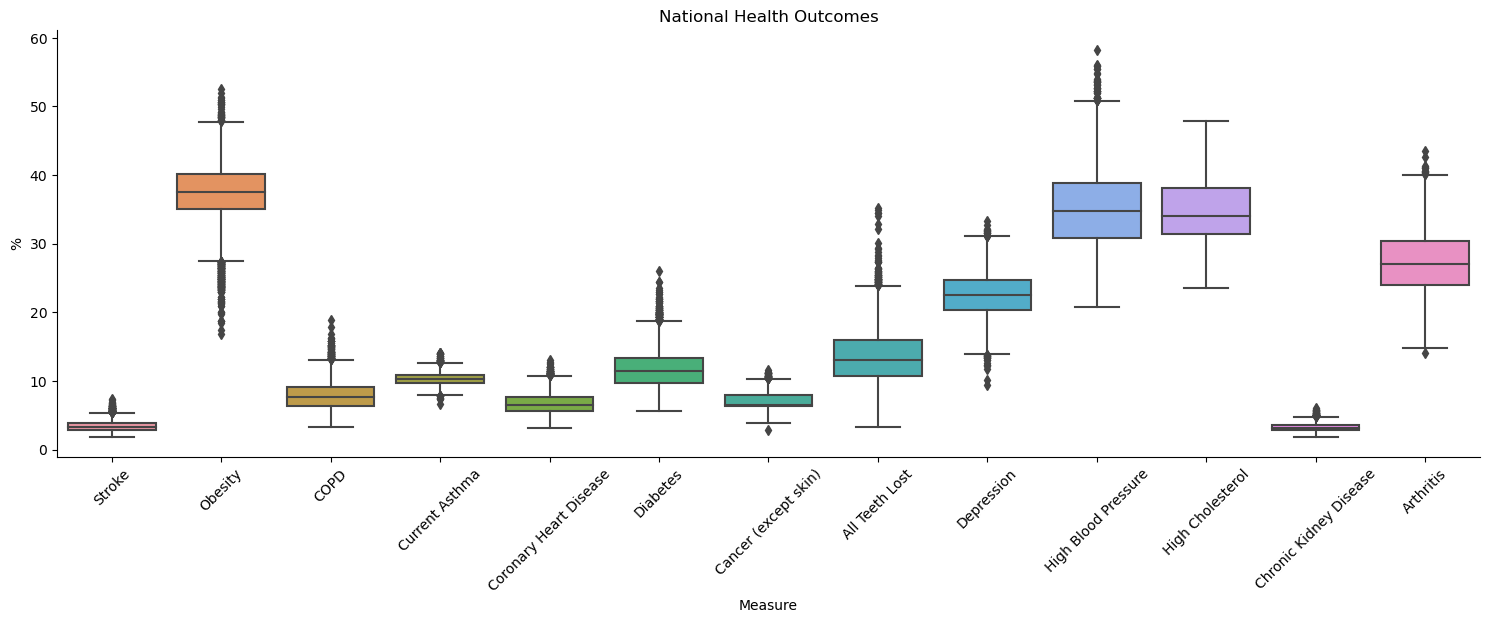

In [9]:
a=sns.catplot(data=places.query('Category == "Health Outcomes"'),
            kind='box', x='Short_Question_Text', y='Data_Value', aspect=3.0)
for ax in a.axes.flat:
    ax.set_title ('National Health Outcomes')
    ax.tick_params ('x', labelrotation=45)
    ax.set_ylabel ('%')
    ax.set_xlabel ('Measure')

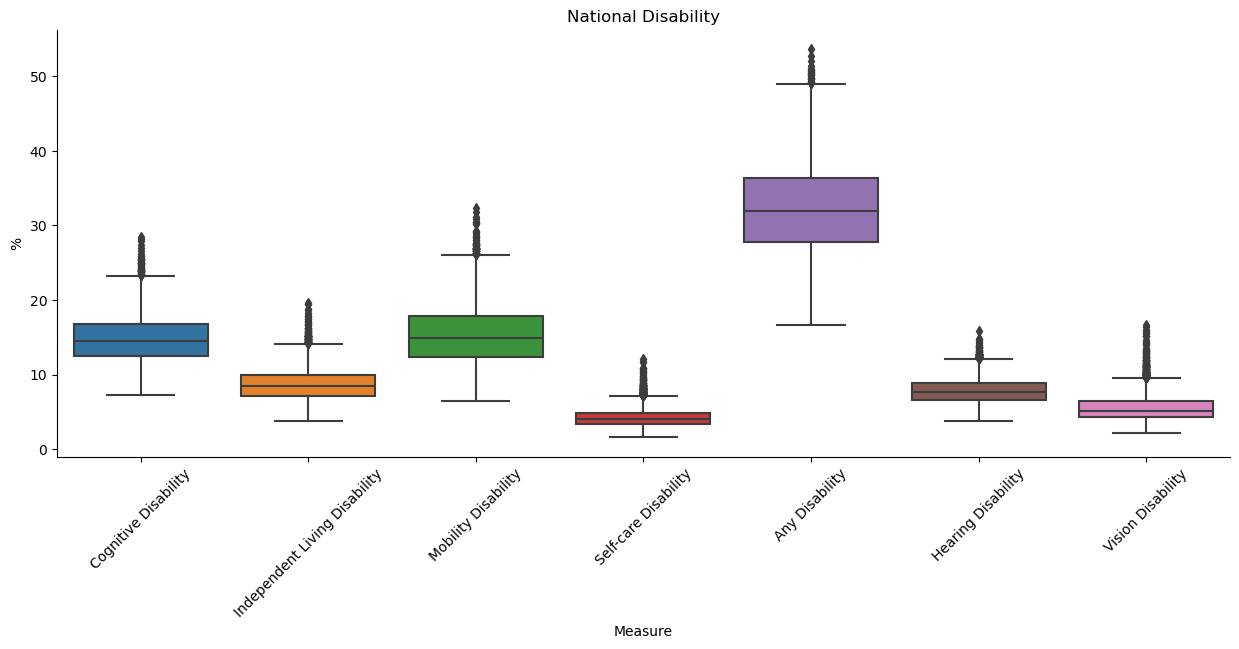

In [10]:
a=sns.catplot(data=places.query('Category == "Disability"'),
            kind='box', x='Short_Question_Text', y='Data_Value', aspect=2.5)
for ax in a.axes.flat:
    ax.set_title ('National Disability')
    ax.tick_params ('x', labelrotation=45)
    ax.set_ylabel ('%')
    ax.set_xlabel ('Measure')

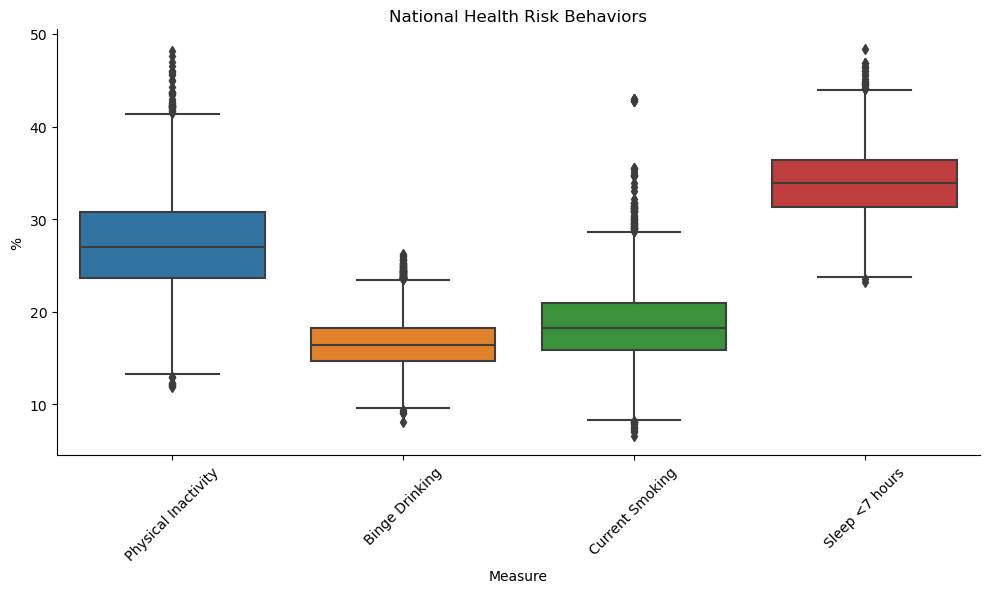

In [11]:
a=sns.catplot(data=places.query('Category == "Health Risk Behaviors"'),
            kind='box', x='Short_Question_Text', y='Data_Value', aspect=2.0)
for ax in a.axes.flat:
    ax.set_title ('National Health Risk Behaviors')
    ax.tick_params ('x', labelrotation=45)
    ax.set_ylabel ('%')
    ax.set_xlabel ('Measure')

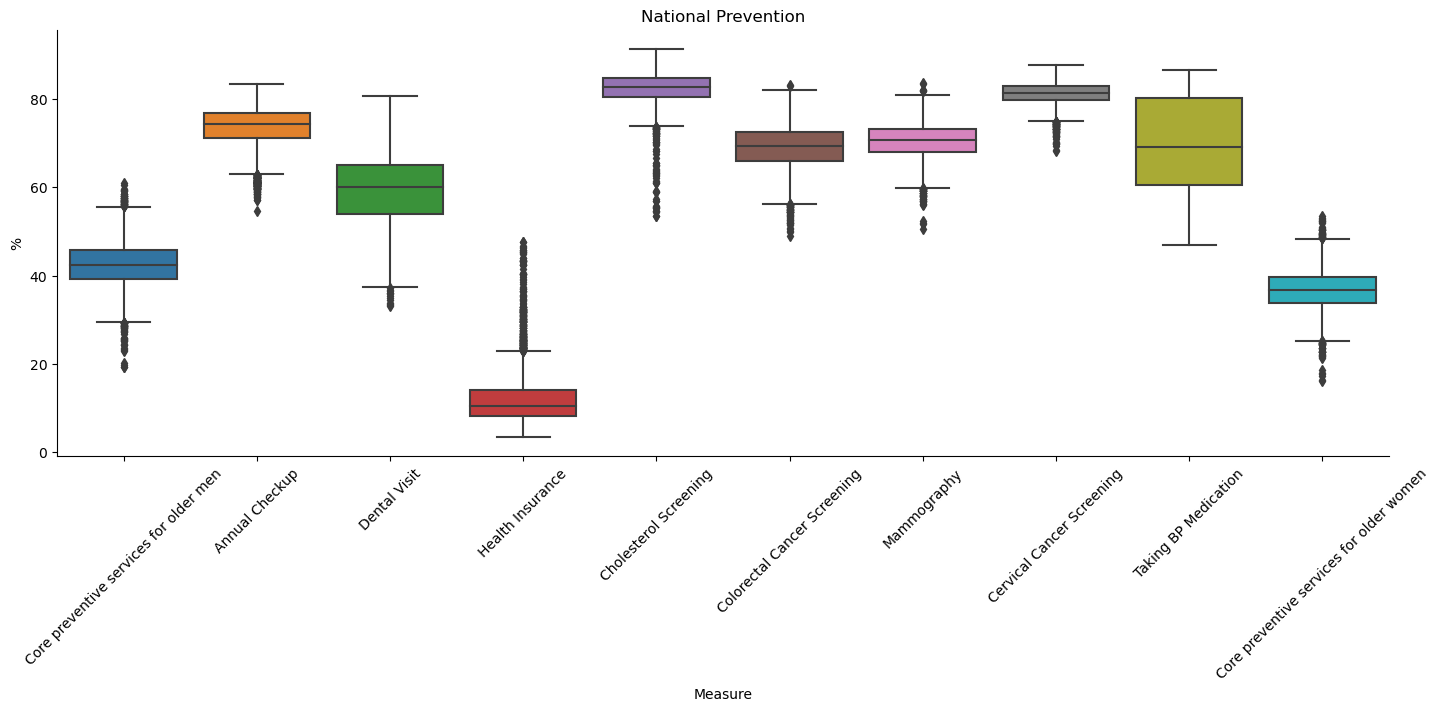

In [12]:
a=sns.catplot(data=places.query('Category == "Prevention"'),
            kind='box', x='Short_Question_Text', y='Data_Value', aspect=3.0)
for ax in a.axes.flat:
    ax.set_title ('National Prevention')
    ax.tick_params ('x', labelrotation=45)
    ax.set_ylabel ('%')
    ax.set_xlabel ('Measure')

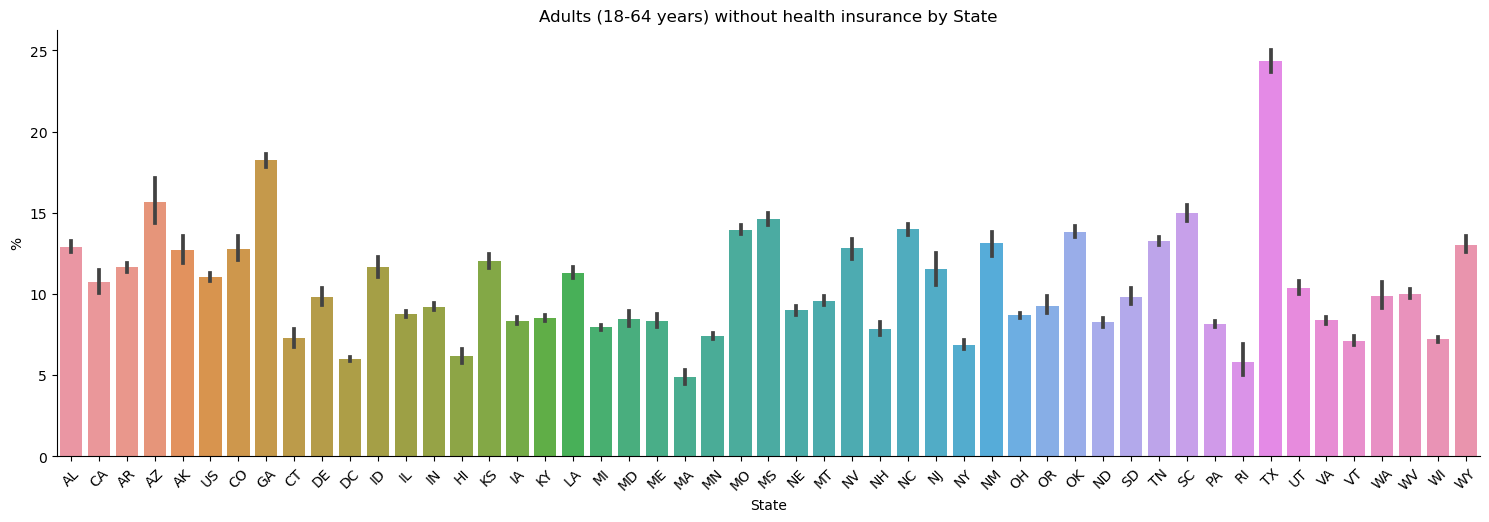

In [13]:
a=sns.catplot(data=places.query('Short_Question_Text == "Health Insurance"'),
            kind='bar', x='StateAbbr', y='Data_Value', aspect=3.0)
for ax in a.axes.flat:
    ax.set_title ('Adults (18-64 years) without health insurance by State')
    ax.tick_params ('x', labelrotation=45)
    ax.set_ylabel ('%')
    ax.set_xlabel ('State')

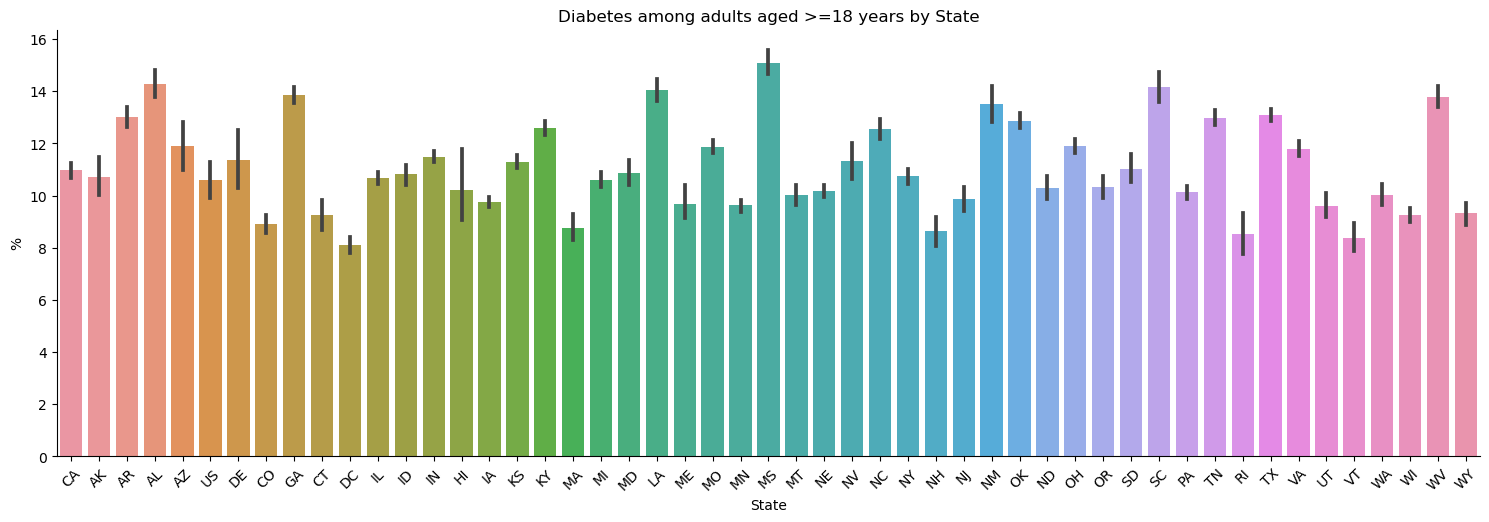

In [14]:
a=sns.catplot(data=places.query('MeasureId == "DIABETES"'),
            kind='bar', x='StateAbbr', y='Data_Value', aspect=3.0)
for ax in a.axes.flat:
    ax.set_title ('Diabetes among adults aged >=18 years by State')
    ax.tick_params ('x', labelrotation=45)
    ax.set_ylabel ('%')
    ax.set_xlabel ('State')     

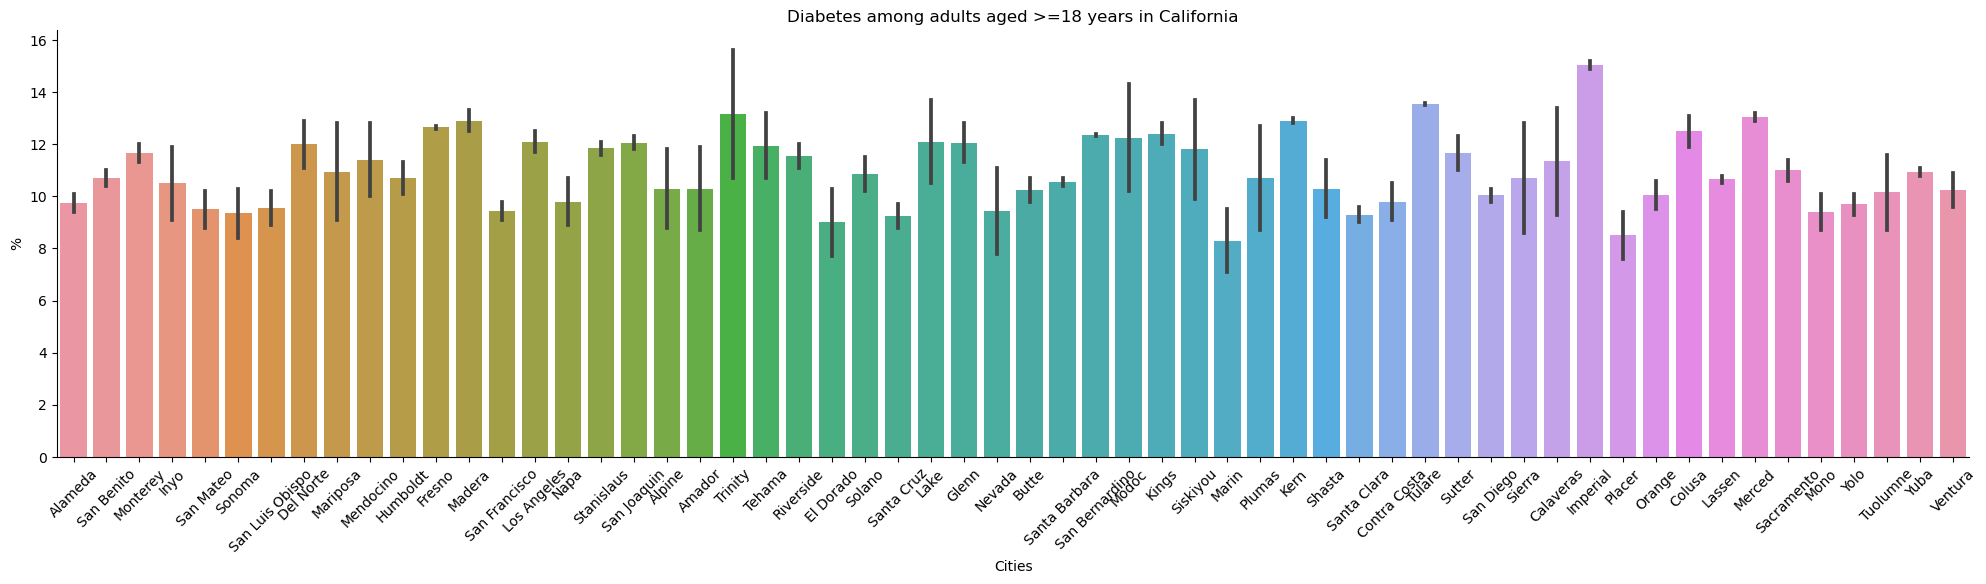

In [15]:
a=sns.catplot(data=places.query('MeasureId == "DIABETES" and StateAbbr == "CA"'),
            kind='bar', x='LocationName', y='Data_Value', aspect=4.0)
for ax in a.axes.flat:
    ax.set_title ('Diabetes among adults aged >=18 years in California')
    ax.tick_params ('x', labelrotation=45)
    ax.set_ylabel ('%')
    ax.set_xlabel ('Cities')   

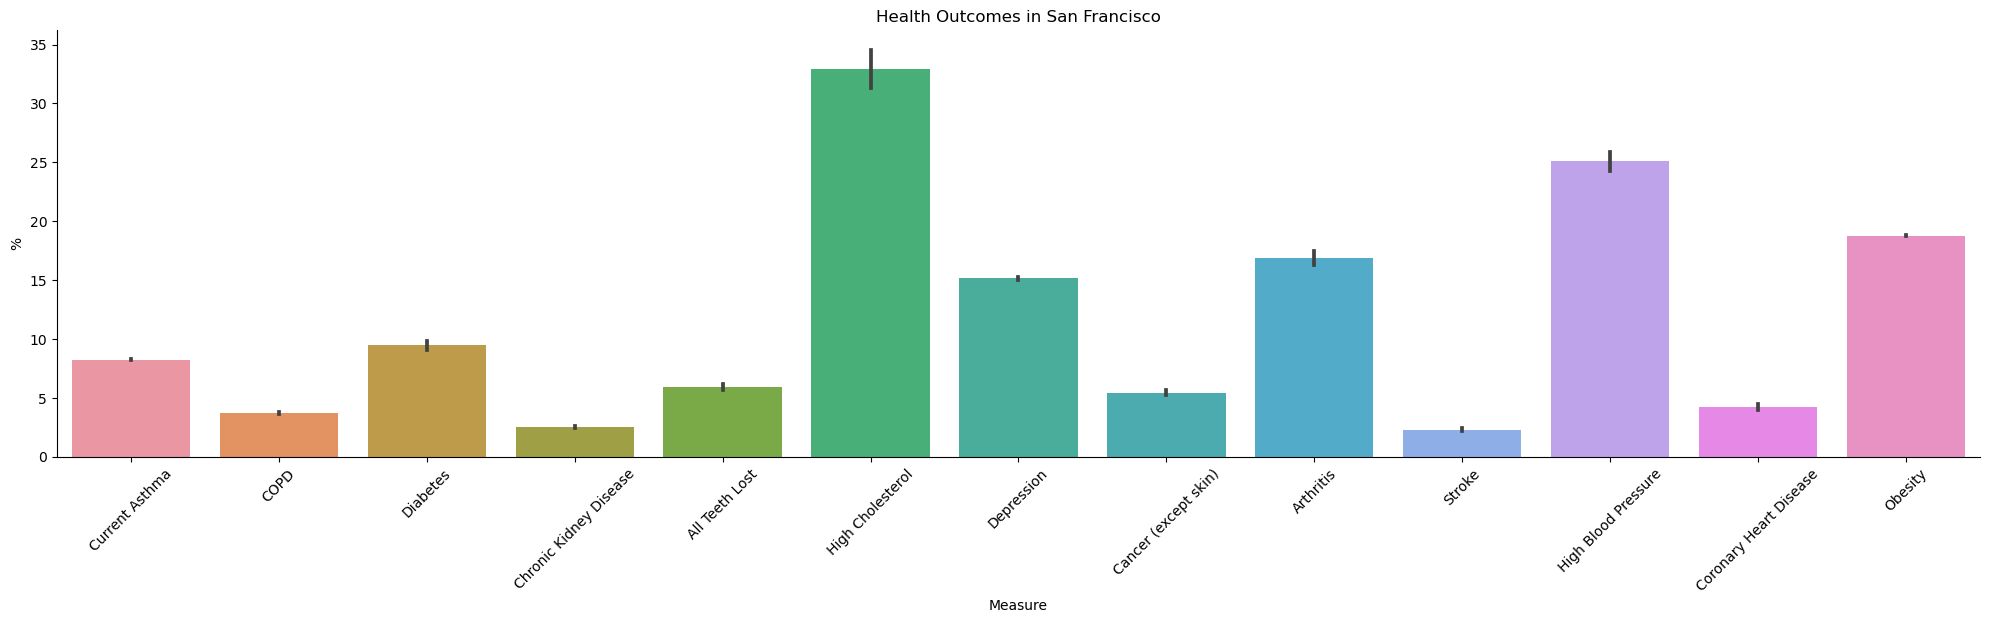

In [16]:
a=sns.catplot(data=places.query('Category == "Health Outcomes" and LocationName == "San Francisco"'),
            kind='bar', x='Short_Question_Text', y='Data_Value', aspect=4.0)
for ax in a.axes.flat:
    ax.set_title ('Health Outcomes in San Francisco')
    ax.tick_params ('x', labelrotation=45)
    ax.set_ylabel ('%')
    ax.set_xlabel ('Measure')  

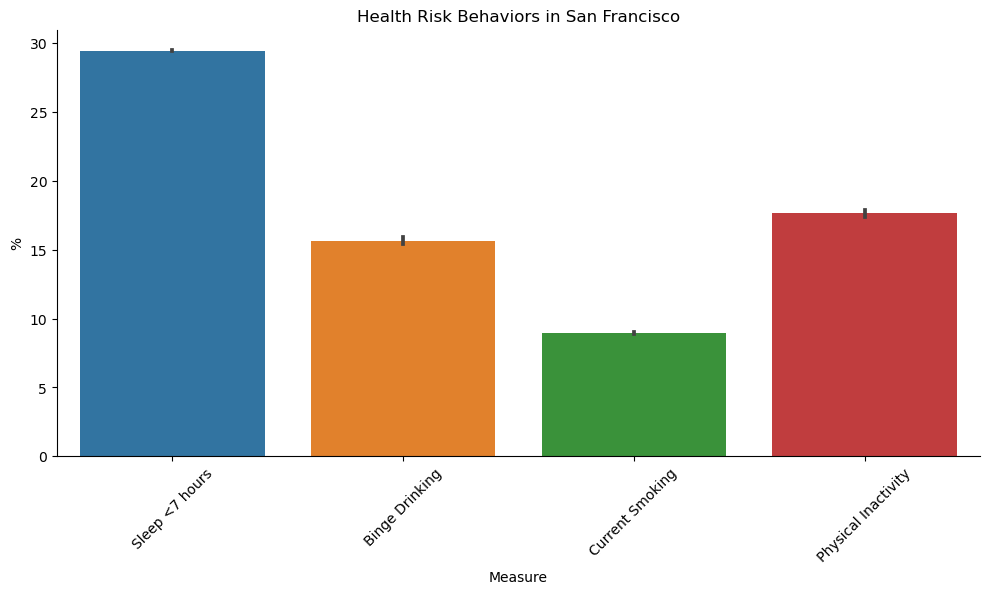

In [20]:
a=sns.catplot(data=places.query('Category == "Health Risk Behaviors" and LocationName == "San Francisco"'),
            kind='bar', x='Short_Question_Text', y='Data_Value', aspect=2.0)
for ax in a.axes.flat:
    ax.set_title ('Health Risk Behaviors in San Francisco')
    ax.tick_params ('x', labelrotation=45)
    ax.set_ylabel ('%')
    ax.set_xlabel ('Measure')  

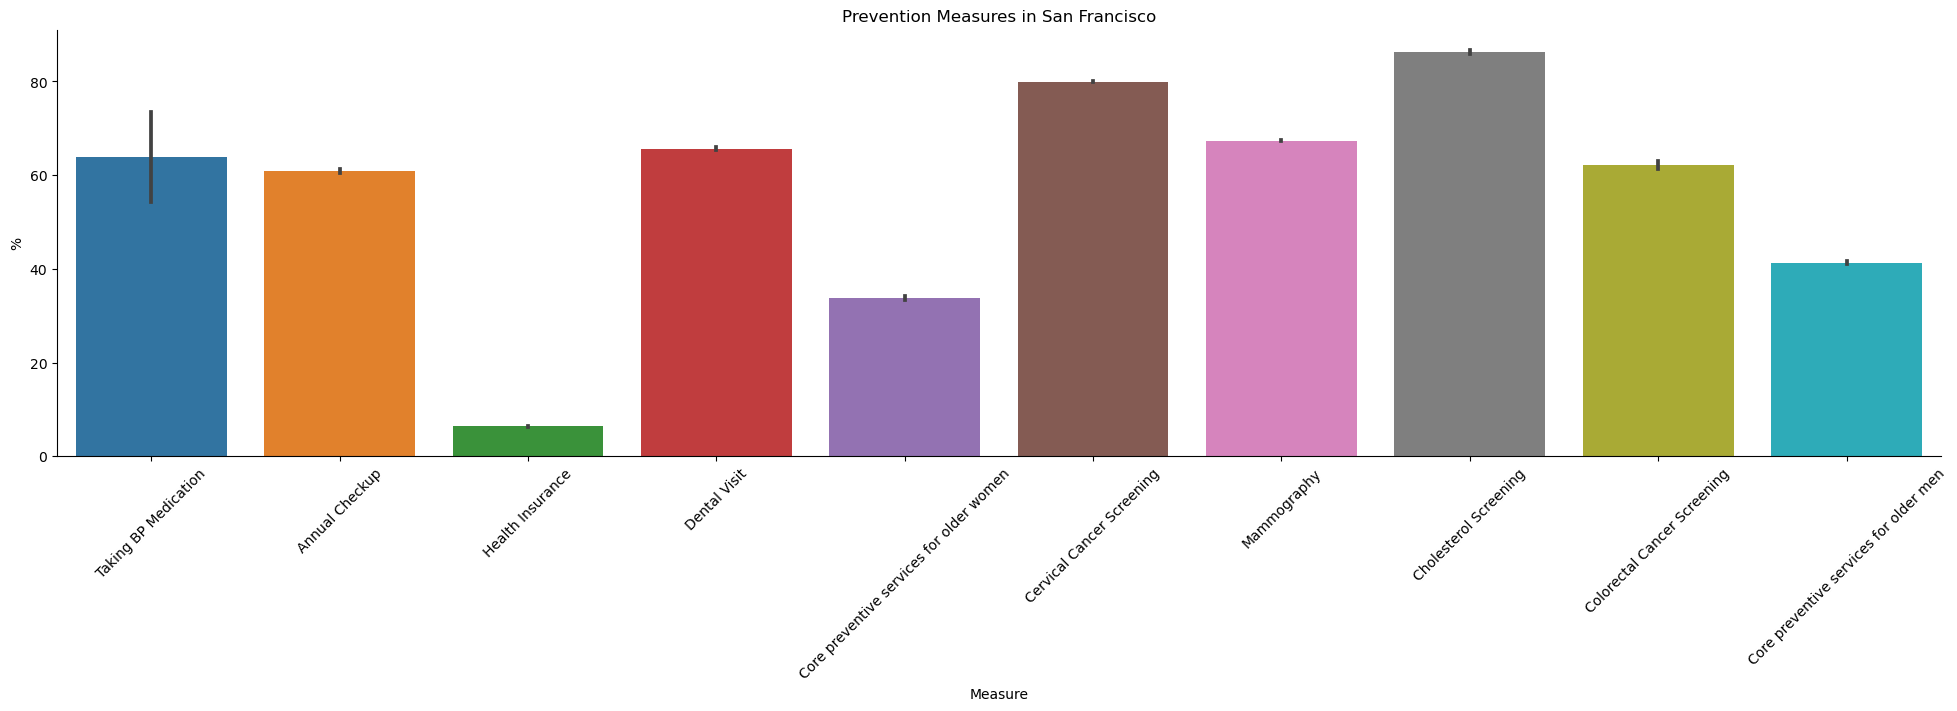

In [18]:
a=sns.catplot(data=places.query('Category == "Prevention" and LocationName == "San Francisco"'),
            kind='bar', x='Short_Question_Text', y='Data_Value', aspect=4.0)
for ax in a.axes.flat:
    ax.set_title ('Prevention Measures in San Francisco')
    ax.tick_params ('x', labelrotation=45)
    ax.set_ylabel ('%')
    ax.set_xlabel ('Measure')  